# Registration Sandbox
This notebook is a test-bed for regularization and reconstruction methods

In [11]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import libwallerlab.projects.motiondeblur as md
from libwallerlab.utilities.io import Dataset, isDataset

# Platform imports
import os, glob

# Debugging imports
import llops as yp
import numpy as np
import matplotlib.pyplot as plt

yp.config.setDefaultBackend('numpy')
yp.config.setDefaultDatatype('float32')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load Data

In [21]:
# Define user for path setting
dataset_path = '/Users/zfphil/datasets/motiondeblur/'

# Define which dataset to use
dataset_type = 'coded'
dataset_label =  'res'

# Find files in this directory
folder_list = glob.glob(os.path.join(dataset_path, '*/'))
dataset_list = [folder for folder in folder_list if isDataset(folder)]

# Filter datasets in directory
filtered_dataset_list = [folder_name for folder_name in folder_list if (dataset_type in folder_name) and (dataset_label in folder_name)]
assert not len(filtered_dataset_list) > 1, "More than one dataset with criterion found!"
assert not len(filtered_dataset_list) == 0, "No dataset with criterion found!"

# Create dataset object (loads metadata)
dataset = Dataset(filtered_dataset_list[0], use_experimental_background=False)

# Force type to be motiondeblur
dataset.metadata.type = 'motiondeblur'

# Select green channel
dataset.channel_mask = [0]

# Preprocess dataset (md-specific)
md.preprocess(dataset)

Loading 1 frames...


# Create Reconstruction Object And Normalize Measurements

In [5]:
# Set position segment
dataset.position_segment_indicies = [0]
# dataset.frame_mask = [20, 21, 22]

# Create recon object
recon = md.recon.Reconstruction(dataset, alpha_blend_distance=1000, pad_value=0)

# Apply frame-dependent position offset
recon.applyFrameDependentOffset(offset=26)

# Normalize measurements
# scale = recon.normalize_measurements(wrap_coefficient=None)  #0.22

Loading 5 frames...


<IPython.core.display.Javascript object>


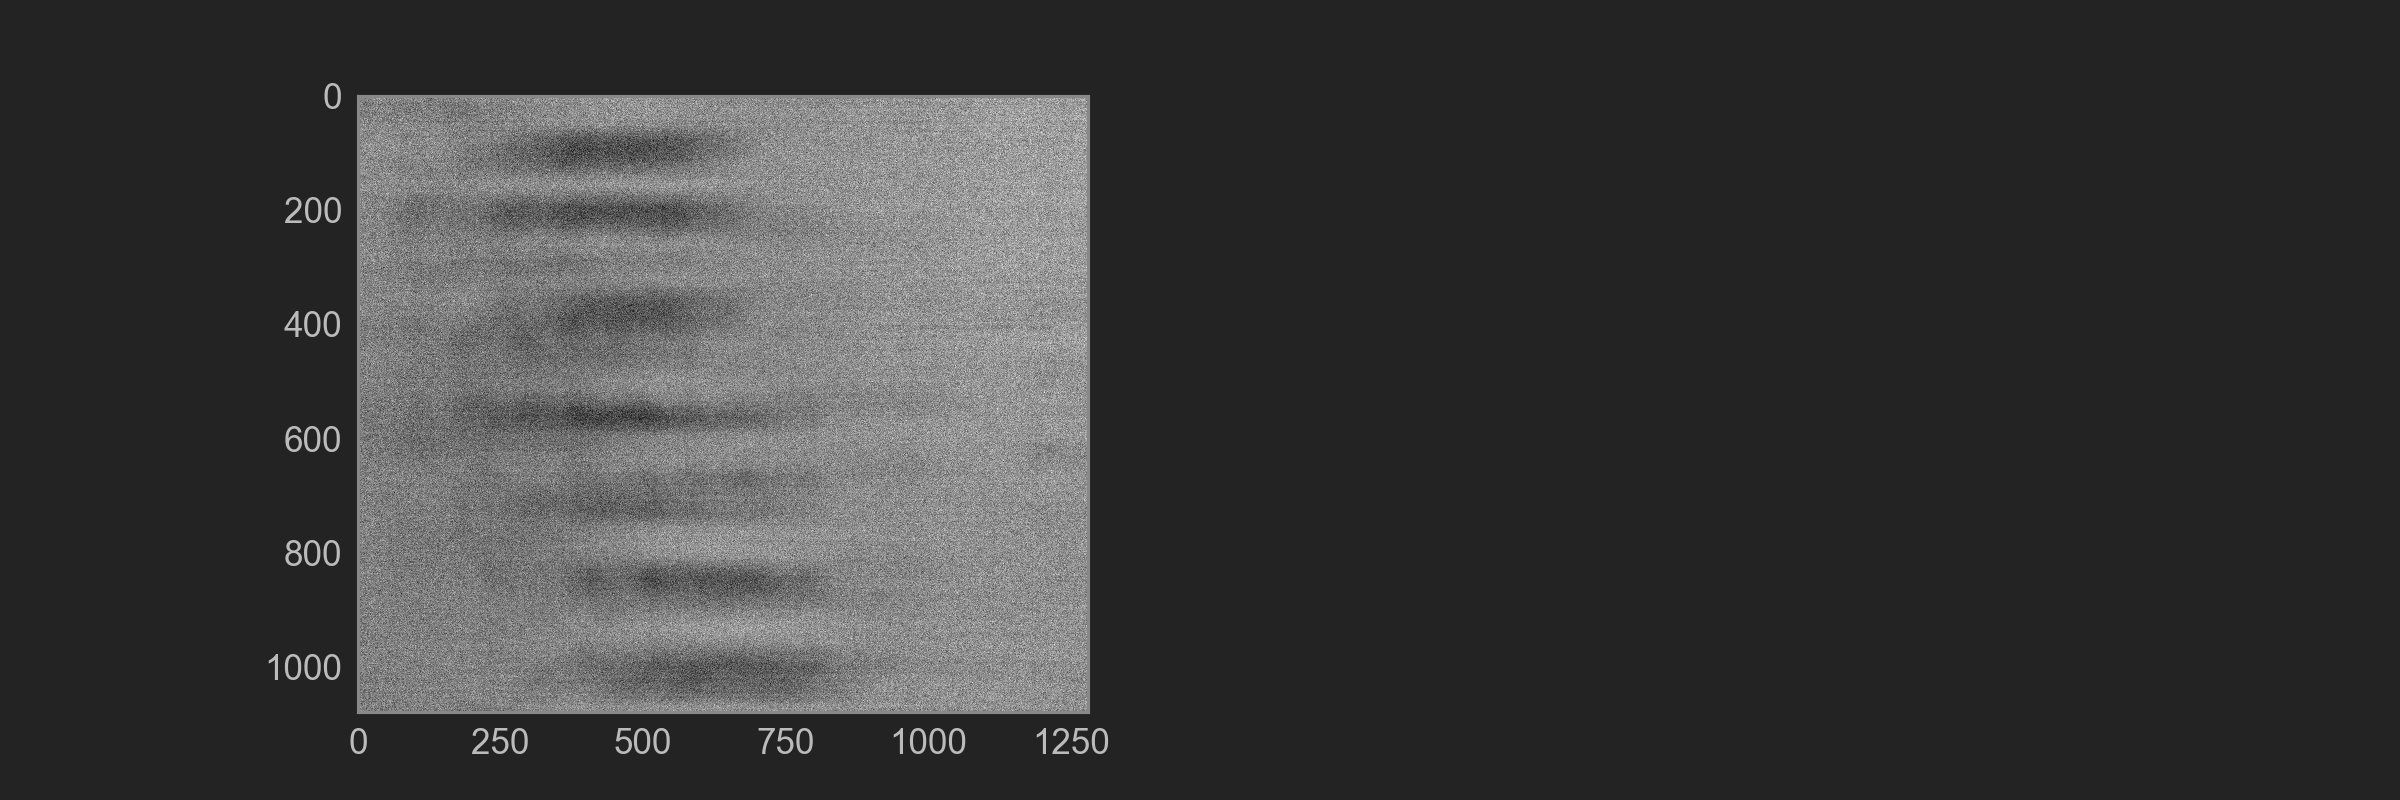

In [24]:
plt.figure()
plt.subplot(121)
plt.imshow(dataset.frame_list[0])


<IPython.core.display.Javascript object>


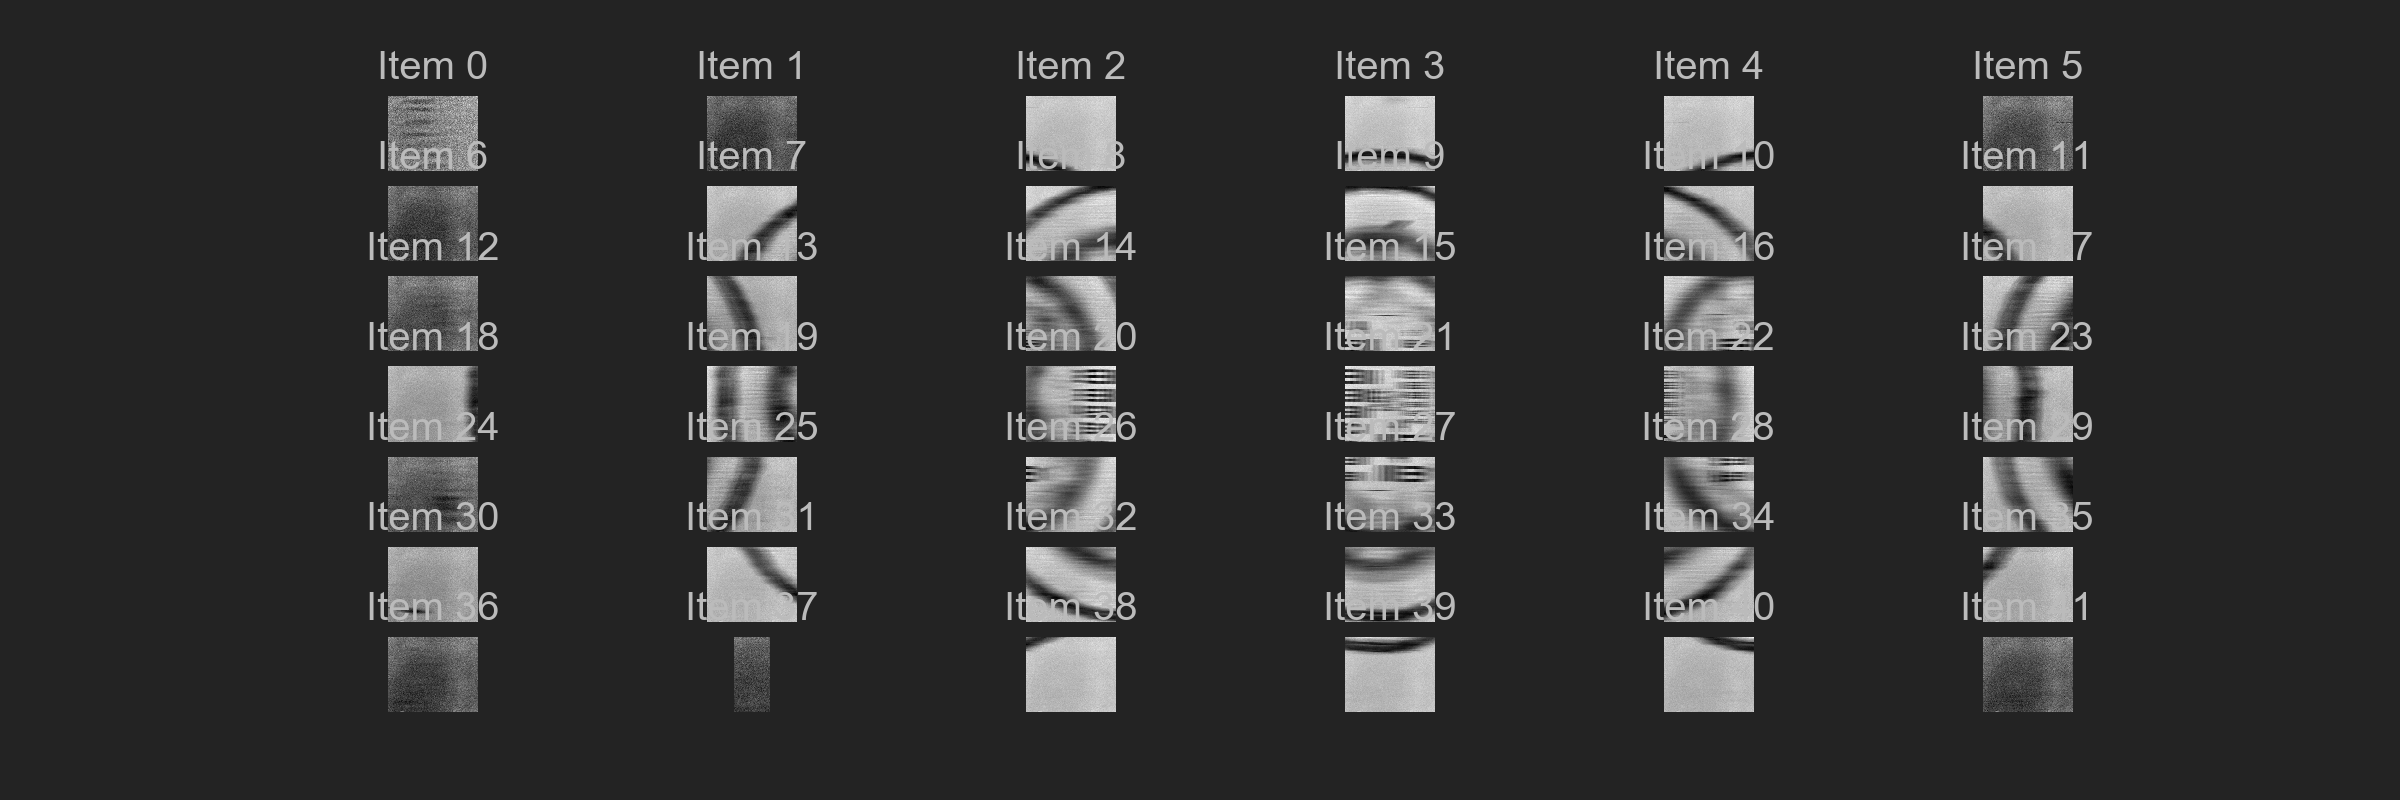

In [15]:
yp.display.listPlotFlat(dataset.frame_list, figsize=(12,12))

<IPython.core.display.Javascript object>


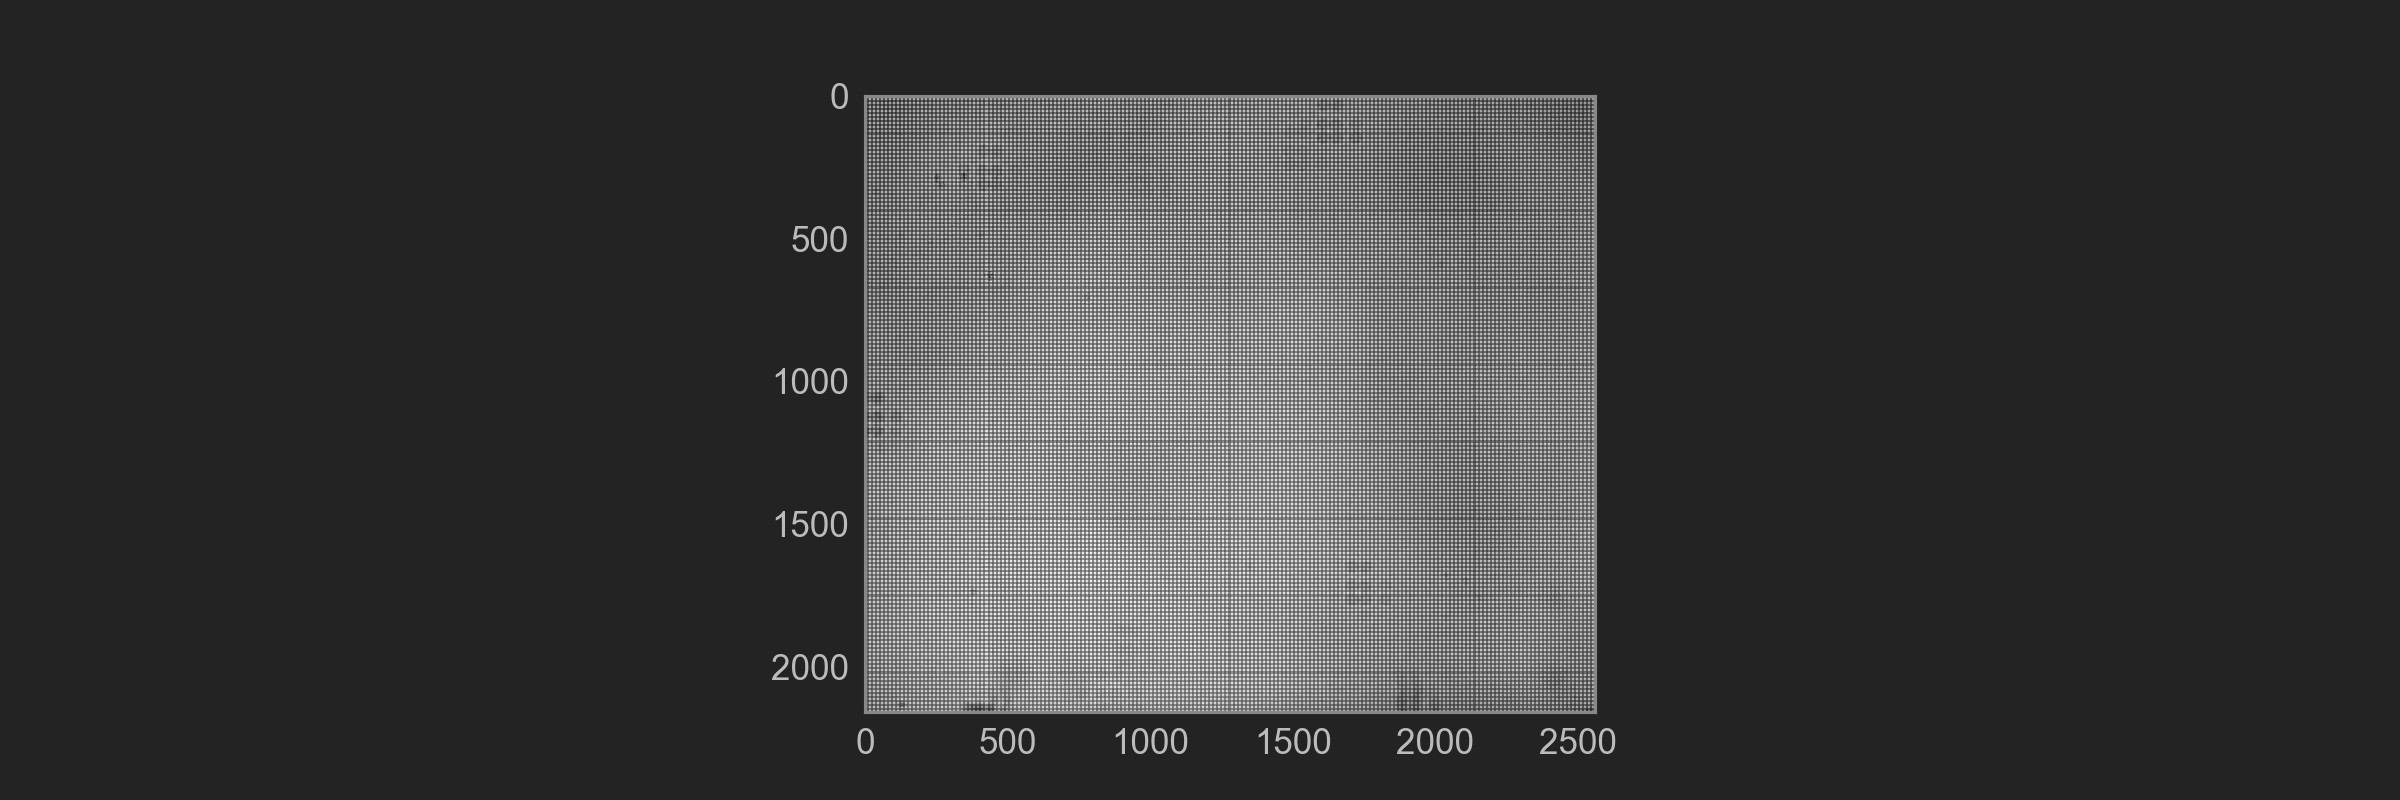

In [18]:
plt.figure()
plt.imshow(yp.real(dataset.frame_background))

<IPython.core.display.Javascript object>


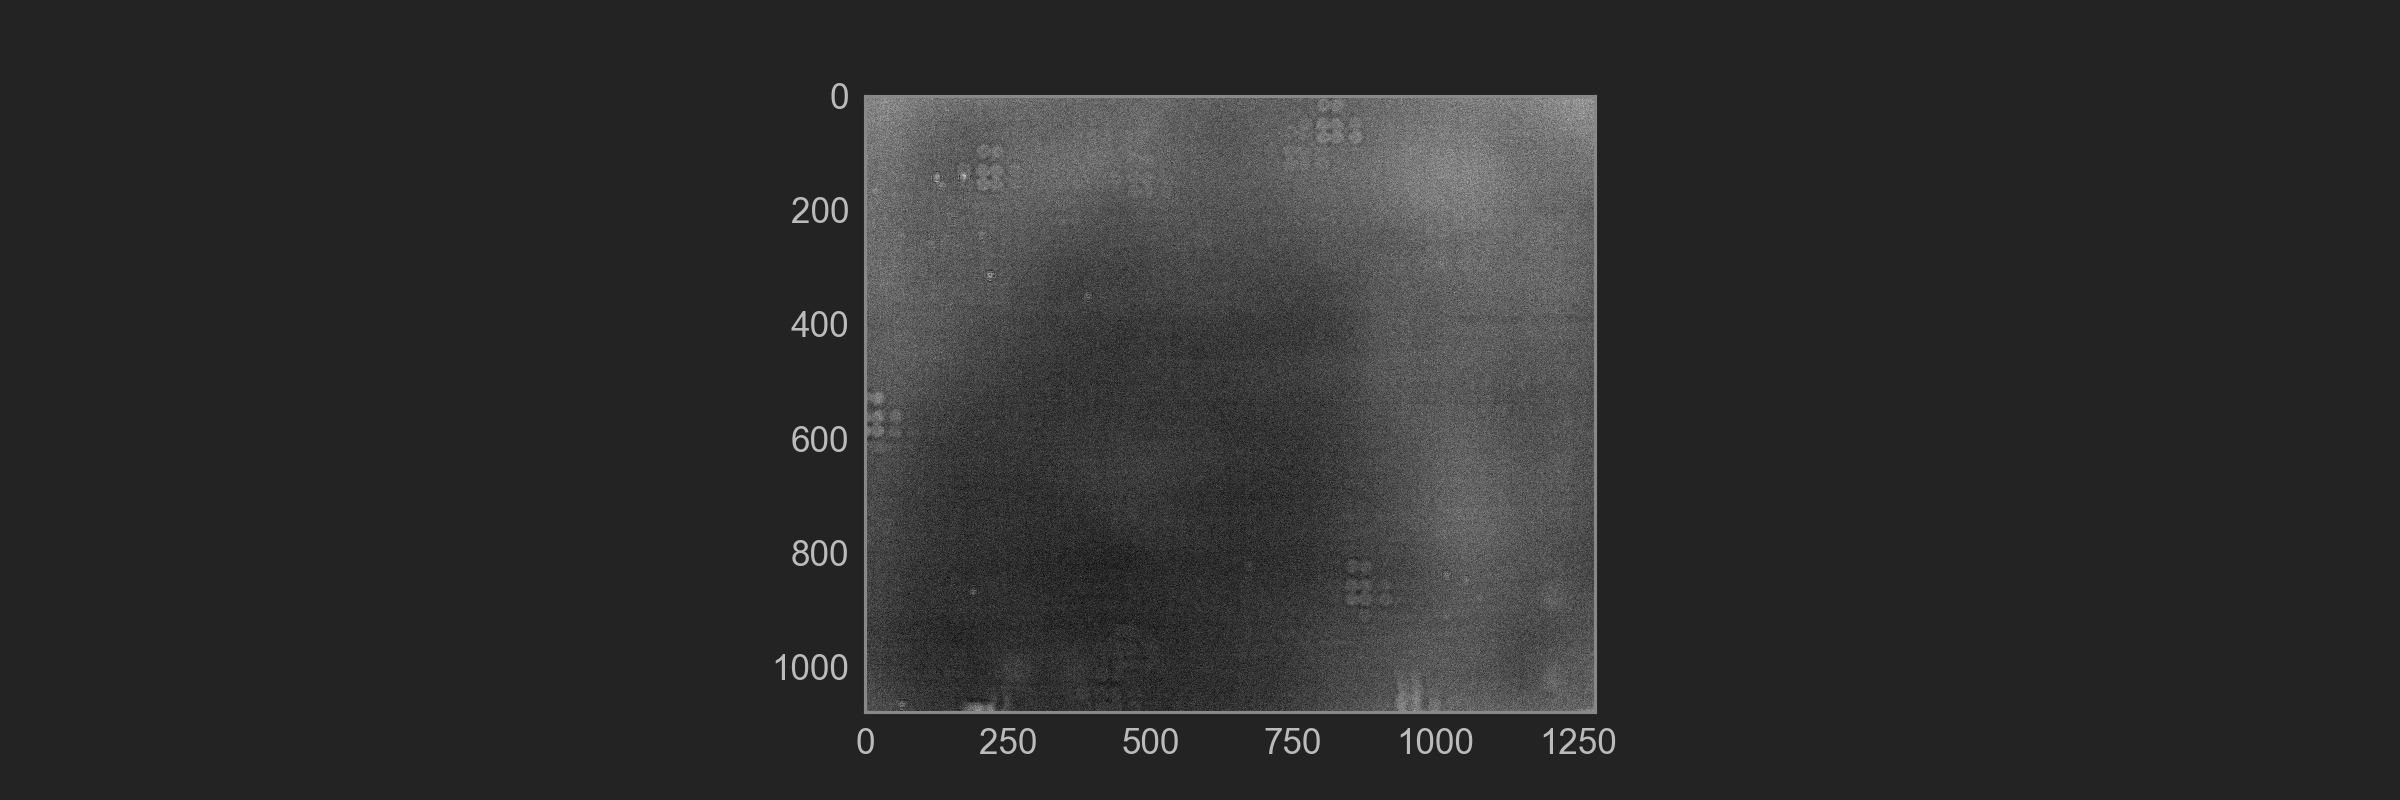

In [17]:


bg_frame_list = [1,5,12,36,37,41]
bg_frames= [dataset.frame_list[frame_index] for frame_index in bg_frame_list]

bg_mean = sum(bg_frames) / len(bg_frame_list)

plt.figure()
plt.imshow(bg_mean)

<IPython.core.display.Javascript object>


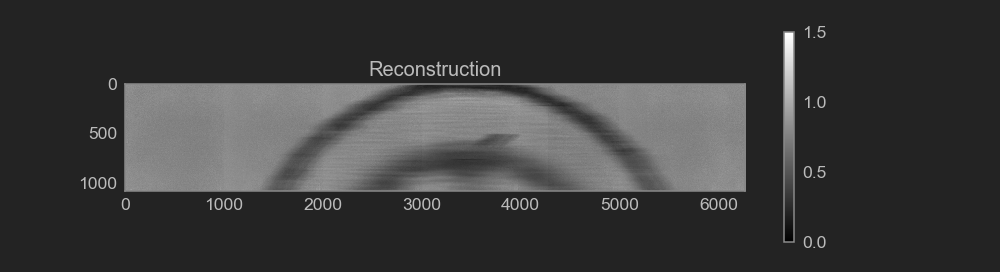

In [89]:
# recon._gen_forward_operators()
recon.reconstruct(iteration_count=-1, step_size=1, mode='static', reg_types={'l2': 1e-3, 'tv': 5e-4})
recon.show(clim=(0,1.5))

Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    2.12e+06    |       0.00       |    0.00e+00    |  516.3 MB / 4130.9 MB  |
|   10   |    3.44e+03    |       2.46       |    8.06e-01    |  516.3 MB / 4214.3 MB  |
|   20   |    3.41e+03    |       5.02       |    4.49e-01    |  516.3 MB / 4214.3 MB  |
|   30   |    3.42e+03    |       7.57       |    2.40e-01    |  516.3 MB / 4214.3 MB  |
|   40   |    3.43e+03    |      10.11       |    1.36e-01    |  516.3 MB / 4214.3 MB  |
|   50   |    3.43e+03    |      12.67       |    5.00e-02    |  516.3 MB / 4214.3 MB  |
|   60   |    3.43e+03    |      15.24       |    4.88e-04    |  516.3 MB / 4214.3 MB  |
|   70   |    3.42e+03    |      17.80       |    1.88e-02    |  516.3 MB / 4214.3 MB  |
|   80   |    3.42e+03    |      20.36       |    1.76e-02    |  516.3 MB / 4214.3 MB  |
|   90   |    3.42e+0

<IPython.core.display.Javascript object>


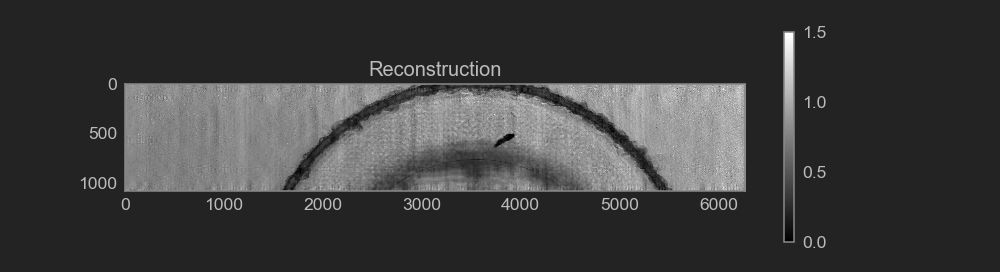

In [81]:
recon.reconstruct(iteration_count=100, step_size=1, mode='global', reg_types={'l2': 1e-3, 'tv': 5e-4})
recon.show(clim=(0,1.5))

In [84]:
x_gauss = recon.y_list[0].copy()

In [ ]:
x_svd = recon.y_list[0].copy()

In [82]:
x_none = recon.y_list[0].copy()

In [86]:
yp.scalar(yp.sum(yp.real(x_gauss - x_none)))

1218.997